# Correlation
### CA2 @ EPS Course

#### Instructors: Dr. Tavassolipour, Dr. Vahabie

---

### Instructions:
-  Replace the placeholders (between <font color="green">`## TODO ##`</font> and <font color="green">`## TODO ##`</font>) with the appropriate details.
- Ensure you run each cell after you've entered your solution.

---

*Full Name:* Ali Borzoozadeh

*SID:* 810102410

The objective of this notebook is to understand the concept of correlation.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

## Calculate Correlation
complete `correlation` function that calculate the correlation matrix of a data fram.

**Note:** you are not allowed to use `pandas.core.frame.DataFrame.corr()` method

In [2]:
def correlation(data: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the correlation matrix from a given dataset.

    Args:
        data (pandas.core.frame.DataFrame): The dataset, where each row represents an observation and each column represents a feature.

    Returns:
        correlation_matrix (pandas.core.frame.DataFrame): The correlation matrix.
    """
    data = data.dropna()
    data = data.apply(pd.to_numeric, errors='coerce')
    data = data.dropna()
    
    mean = data.mean()
    centered_data = data - mean
    
    covariance_matrix = np.dot(centered_data.T, centered_data) / (len(data) - 1)
    std_dev = np.sqrt(np.diag(covariance_matrix))
    correlation_matrix = covariance_matrix / np.outer(std_dev, std_dev)
    correlation_matrix = pd.DataFrame(correlation_matrix, index=data.columns, columns=data.columns)
    
    return correlation_matrix

### Convert to Datetime and Extract Features

In [3]:
data = pd.read_csv('../data/energy.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'], errors='coerce')

print(data.head())

             Datetime   AEP_MW
0 2004-12-31 01:00:00  13478.0
1 2004-12-31 02:00:00  12865.0
2 2004-12-31 03:00:00  12577.0
3 2004-12-31 04:00:00  12517.0
4 2004-12-31 05:00:00  12670.0


In [4]:
data['Year'] = data['Datetime'].dt.year
data['Month'] = data['Datetime'].dt.month
data['Hour'] = data['Datetime'].dt.hour

print(data.head())

             Datetime   AEP_MW  Year  Month  Hour
0 2004-12-31 01:00:00  13478.0  2004     12     1
1 2004-12-31 02:00:00  12865.0  2004     12     2
2 2004-12-31 03:00:00  12577.0  2004     12     3
3 2004-12-31 04:00:00  12517.0  2004     12     4
4 2004-12-31 05:00:00  12670.0  2004     12     5


### Plot Energy Usage Over Years

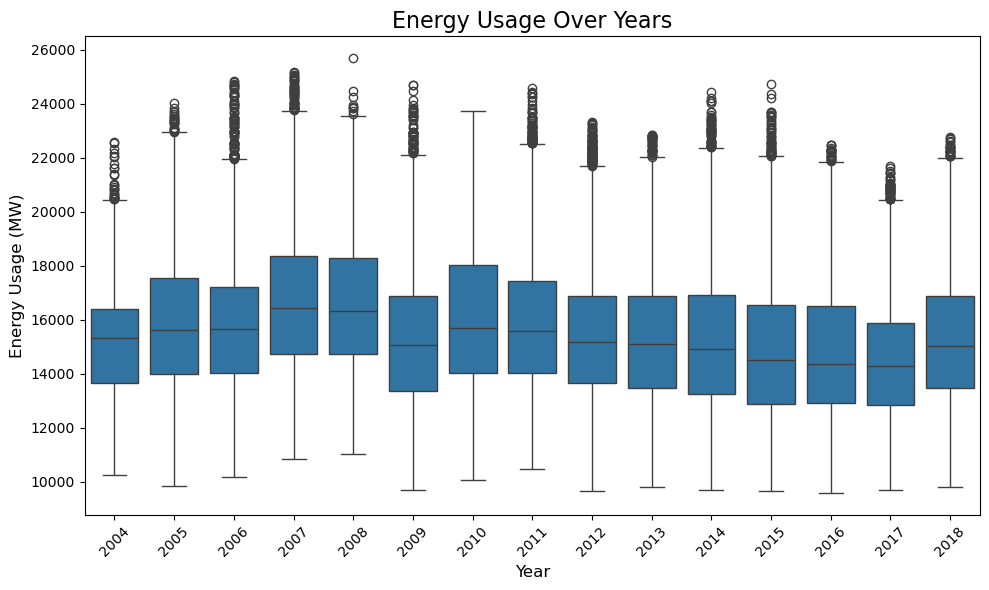

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='AEP_MW', data=data)

plt.title('Energy Usage Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Energy Usage (MW)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Analyze Energy Usage Over Years

Given that the boxplot chart displays the range of changes of a variable, according to the chart, the range of changes in 2005 is larger, and intuitively it can be said that the variance of electricity consumption in the days of 2005 is greater.

In [6]:
data_2004 = data[data['Year'] == 2004]
data_2005 = data[data['Year'] == 2005]

variance_2004 = data_2004['AEP_MW'].var()
variance_2005 = data_2005['AEP_MW'].var()

print(f"Variance of AEP_MW in 2004: {variance_2004}")
print(f"Variance of AEP_MW in 2005: {variance_2005}")

if variance_2004 > variance_2005:
    print("Variance in 2004 is greater than in 2005.")
elif variance_2004 < variance_2005:
    print("Variance in 2005 is greater than in 2004.")
else:
    print("Variances in 2004 and 2005 are equal.")

Variance of AEP_MW in 2004: 4312554.643277965
Variance of AEP_MW in 2005: 6609516.545765603
Variance in 2005 is greater than in 2004.


As we can see, by calculating the variance of both, it was found that the variance is higher in 2005.

### Plot Energy Usage Over Hours

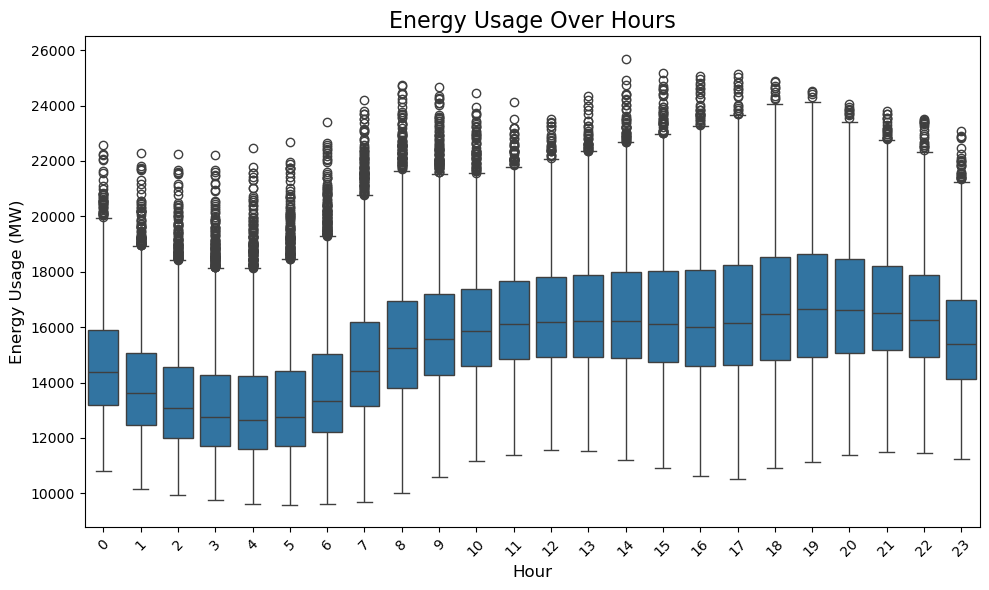

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hour', y='AEP_MW', data=data)

plt.title('Energy Usage Over Hours', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Energy Usage (MW)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph shows that electricity consumption increases as we approach nighttime, with the peak at 7:00 PM.

### Plot Energy Usage Over Months

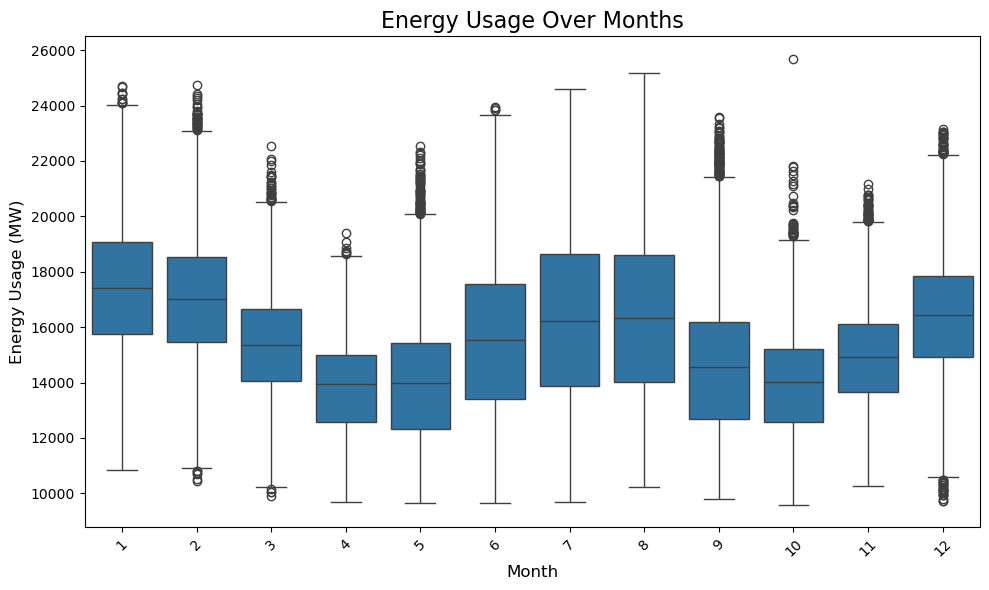

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='AEP_MW', data=data)

plt.title('Energy Usage Over Months', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Energy Usage (MW)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We see that the highest consumption occurs in the months of July and August, which are summer months and usually have high electricity consumption.
Also, in January, when it is Christmas and cold, the use of heating appliances is high and electricity consumption is high.
Overall, electricity consumption is higher in summer and winter than in spring and fall.

### Calculate Correlation Between Specific Hours and Energy Usage

In [9]:
filtered_data = data[(data['Hour'] >= 4) & (data['Hour'] <= 13)]
correlation_matrix = correlation(filtered_data)

correlation_coefficient = correlation_matrix.loc['Hour', 'AEP_MW']

print(f"Correlation coefficient between electricity consumption and time (4 a.m. to 1 p.m.): {correlation_coefficient}")

Correlation coefficient between electricity consumption and time (4 a.m. to 1 p.m.): 0.47137891043962604


### Analyze Correlation Between Specific Hours and Energy Usage

From 4:00 AM to 1:00 PM, electricity consumption is increasing, and around 1:00 PM, it starts to move away from the linear increase and becomes smoother, so a correlation coefficient of 0.47 seems reasonable.

### Calculate Correlation Between Specific Months and Energy Usage

In [10]:
filtered_data = data[(data['Month'] >= 2) & (data['Month'] <= 4)]
correlation_matrix = correlation(filtered_data)

correlation_coefficient = correlation_matrix.loc['Month', 'AEP_MW']

print(f"Correlation coefficient between electricity consumption and time (February to April): {correlation_coefficient}")

Correlation coefficient between electricity consumption and time (February to April): -0.5582445746166736


### Analyze Correlation Between Specific Months and Energy Usage

From February to April, the correlation coefficient was -0.558, which is reasonable according to the graph. The reason for the decrease in electricity consumption could be that we are moving from winter to spring, when the weather becomes milder and the consumption of heating appliances decreases.

### Calculate Correlation Between Specific Months and Energy Usage

In [11]:
filtered_data = data[(data['Month'] >= 10) & (data['Month'] <= 12)]
correlation_matrix = correlation(filtered_data)

correlation_coefficient = correlation_matrix.loc['Month', 'AEP_MW']

print(f"Correlation coefficient between electricity consumption and time (October to December): {correlation_coefficient}")

Correlation coefficient between electricity consumption and time (October to December): 0.4738379625643034


### Analyze Correlation Between Specific Months and Energy Usage

From October to December, we move from autumn to winter and Christmas, and the energy consumption of heating appliances increases, and the correlation coefficient of 0.47 is reasonable, as we can see in the graph.

## Causal Effect

### Between Life Expectancy and Physicians per 1000 people

In [12]:
data = pd.read_csv('../data/TV_LE_Physician.csv')
data_numeric = data.drop(columns=['Country'])
correlation_matrix = correlation(data_numeric)

correlation_coefficient = correlation_matrix.loc['Life Expectancy (years)', 'Physicians per 1000 people']

print(f"Correlation coefficient between Life Expectancy and Physicians per 1000 people: {correlation_coefficient}")

Correlation coefficient between Life Expectancy and Physicians per 1000 people: 0.6288049366929651


The correlation coefficient is relatively significant. We can say that there is a direct linear relationship between these two variables.

### Between Life Expectancy and Televisions per 1000 people

In [13]:
correlation_coefficient = correlation_matrix.loc['Life Expectancy (years)', 'Televisions per 1000 people']

print(f"Correlation coefficient between Life Expectancy and Televisions per 1000 people: {correlation_coefficient}")

Correlation coefficient between Life Expectancy and Televisions per 1000 people: 0.025874817477201034


As we can see, the correlation coefficient is low and it seems that these two variables do not have a specific linear relationship.

### Between Physicians per 1000 people and Televisions per 1000 people

In [14]:
correlation_coefficient = correlation_matrix.loc['Physicians per 1000 people', 'Televisions per 1000 people']

print(f"Correlation coefficient between Physicians per 1000 people and Televisions per 1000 people: {correlation_coefficient}")

Correlation coefficient between Physicians per 1000 people and Televisions per 1000 people: 0.008601707862015733


As we can see, since the number of televisions had no significant relationship with life expectancy, and life expectancy and the number of physicians were related to each other, we expected that the number of physicians and the number of televisions would not have a specific linear relationship, which was also the case according to the correlation coefficient obtained.